In [1]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(tidyr)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: tidyr



In [2]:
coverage=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_ecoregion_MPA.csv")
prox=read.csv("~/Documents/Lenfest/Plot_CSV_v2/proximity_nearest5_LT50km.csv")
noMPA=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_No_MPA_Lists.csv")
adeq=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_Adequate_Area_Sum.csv")



In [3]:
proxcov=merge(prox, coverage, by=c("NAME", "Ecoregion_ID"))

In [6]:
proxcov

NAME,Ecoregion_ID,MPA_Near5_LT50km_Area,FP_MPA_Near5_LT50km_Area,ER_Area,LT50km_MPA_PCT,LT50km_FP_MPA_PCT,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Acadian Atlantic,1,4729.80745,4.271676,100762.16,4.694031596,0.004239365,100762.16,4818.8113,5.212676e+00,4.7823623,0.005173248
Alaskan/Fjordland Pacific,2,2820.86689,0.000000,1701319.78,0.165804625,0.000000000,1701319.78,7022.8311,9.414154e+02,0.4127872,0.055334416
Aleutian Archipelago,3,346.78147,0.000000,185156.13,0.187291380,0.000000000,185156.13,2457.5902,2.123397e+03,1.3273070,1.146814569
American Samoa,4,35357.49573,0.000000,406792.48,8.691777080,0.000000000,406792.48,35373.6660,7.513560e+00,8.6957522,0.001847025
Arctic Basin,5,NA,NA,226486.81,NA,NA,226486.81,0.0000,0.000000e+00,0.0000000,0.000000000
Beaufort/Chukchi Seas,6,0.00000,NA,276280.28,0.000000000,NA,276280.28,816.5224,0.000000e+00,0.2955413,0.000000000
Bering Sea,7,38.88971,0.000000,1295111.91,0.003002807,0.000000000,1295111.91,12889.5145,4.251868e+02,0.9952433,0.032830118
Caribbean Sea,8,3576.27877,0.000000,212352.33,1.684125017,0.000000000,212352.33,3576.2788,9.638159e+01,1.6841250,0.045387584
Carolinian Atlantic,9,1451.63815,0.000000,127879.09,1.135164585,0.000000000,127879.09,1488.9949,1.073831e+01,1.1643771,0.008397238


In [7]:
proxcov$MPA_Near5_LT50km_Area=as.numeric(proxcov$MPA_Near5_LT50km_Area)
proxcov$FP_MPA_Near5_LT50km_Area=as.numeric(proxcov$FP_MPA_Near5_LT50km_Area)

In [8]:
proxcov$LT50km_MPA_PCT=proxcov$MPA_Near5_LT50km_Area/proxcov$MPA.Coverage.Area
proxcov$LT50km_FP_MPA_PCT=proxcov$FP_MPA_Near5_LT50km_Area/proxcov$FP.MPA.Coverage.Area

In [10]:
proxcov$MPA_Near5_LT50km_Area

[1]   4729.80745   2820.86689    346.78147  35357.49573           NA
 [6]      0.00000     38.88971   3576.27877   1451.63815  10411.85760
[11] 248530.42390           NA   3768.78439      0.00000      0.00000
[16]  28067.86791   7302.95486      0.00000      0.00000  10170.76717
[21]   4199.37854           NA   3829.36899      0.00000

In [12]:
mean(na.omit(proxcov$MPA_Near5_LT50km_Area))

[1] 17362.06

In [86]:
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")


In [87]:
adeqprox=merge(adeq, proxcov, by=c("NAME", "Ecoregion_ID"))

In [88]:
head(adeqprox)

,NAME,Ecoregion_ID,Large_MPA_Count,Large_FP_MPA_Count,PCT_Large_MPA_Area,PCT_Large_FP_MPA_Area,MPA_Near5_LT50km_Area,FP_MPA_Near5_LT50km_Area,ER_Area,LT50km_MPA_PCT,LT50km_FP_MPA_PCT,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acadian Atlantic,1,3,0,0.8551312,0,4729.8075,4.271676,100762.2,0.9815299,0.8194784,100762.2,4818.8113,5.212676,4.7823623,0.005173248
2,Alaskan/Fjordland Pacific,2,5,2,0.9999745,1,2820.8669,0.000000,1701319.8,0.4016709,0.0000000,1701319.8,7022.8311,941.415360,0.4127872,0.055334416
3,Aleutian Archipelago,3,2,2,0.9245074,1,346.7815,0.000000,185156.1,0.1411063,0.0000000,185156.1,2457.5902,2123.397473,1.3273070,1.146814569
4,American Samoa,4,2,0,0.9996316,0,35357.4957,0.000000,406792.5,0.9995429,0.0000000,406792.5,35373.6660,7.513560,8.6957522,0.001847025
5,Arctic Basin,5,0,0,0.0000000,0,NA,NA,226486.8,NA,NA,226486.8,0.0000,0.000000,0.0000000,0.000000000
6,Beaufort/Chukchi Seas,6,1,0,0.4986564,0,0.0000,NA,276280.3,0.0000000,NA,276280.3,816.5224,0.000000,0.2955413,0.000000000


In [89]:
adeqproxr=merge(adeqprox, region, by=c("NAME", "Ecoregion_ID"))

In [90]:
adeqproxsimp=adeqprox[,c("NAME","Ecoregion_ID","PCT_Large_MPA_Area", "PCT_Large_FP_MPA_Area", "LT50km_MPA_PCT","LT50km_FP_MPA_PCT")]

In [91]:
adeqproxsimpr=merge(adeqproxsimp, region, by=c("NAME", "Ecoregion_ID"))

In [92]:
adeqproxsimpr=pivot_longer(adeqproxsimpr,
  cols=c("LT50km_MPA_PCT","LT50km_FP_MPA_PCT"),
  names_to = c("PA2"),

  values_to = "percent_LT50"
         )

In [93]:
adeqproxsimpr

NAME,Ecoregion_ID,PCT_Large_MPA_Area,PCT_Large_FP_MPA_Area,Region,PA2,percent_LT50
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,0.8551312,0.0000000,East Coast,LT50km_MPA_PCT,9.815299e-01
Acadian Atlantic,1,0.8551312,0.0000000,East Coast,LT50km_FP_MPA_PCT,8.194784e-01
Alaskan/Fjordland Pacific,2,0.9999745,1.0000000,Alaska,LT50km_MPA_PCT,4.016709e-01
Alaskan/Fjordland Pacific,2,0.9999745,1.0000000,Alaska,LT50km_FP_MPA_PCT,0.000000e+00
Aleutian Archipelago,3,0.9245074,1.0000000,Alaska,LT50km_MPA_PCT,1.411063e-01
Aleutian Archipelago,3,0.9245074,1.0000000,Alaska,LT50km_FP_MPA_PCT,0.000000e+00
American Samoa,4,0.9996316,0.0000000,Pacific Islands,LT50km_MPA_PCT,9.995429e-01
American Samoa,4,0.9996316,0.0000000,Pacific Islands,LT50km_FP_MPA_PCT,0.000000e+00
Arctic Basin,5,0.0000000,0.0000000,Alaska,LT50km_MPA_PCT,NA


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


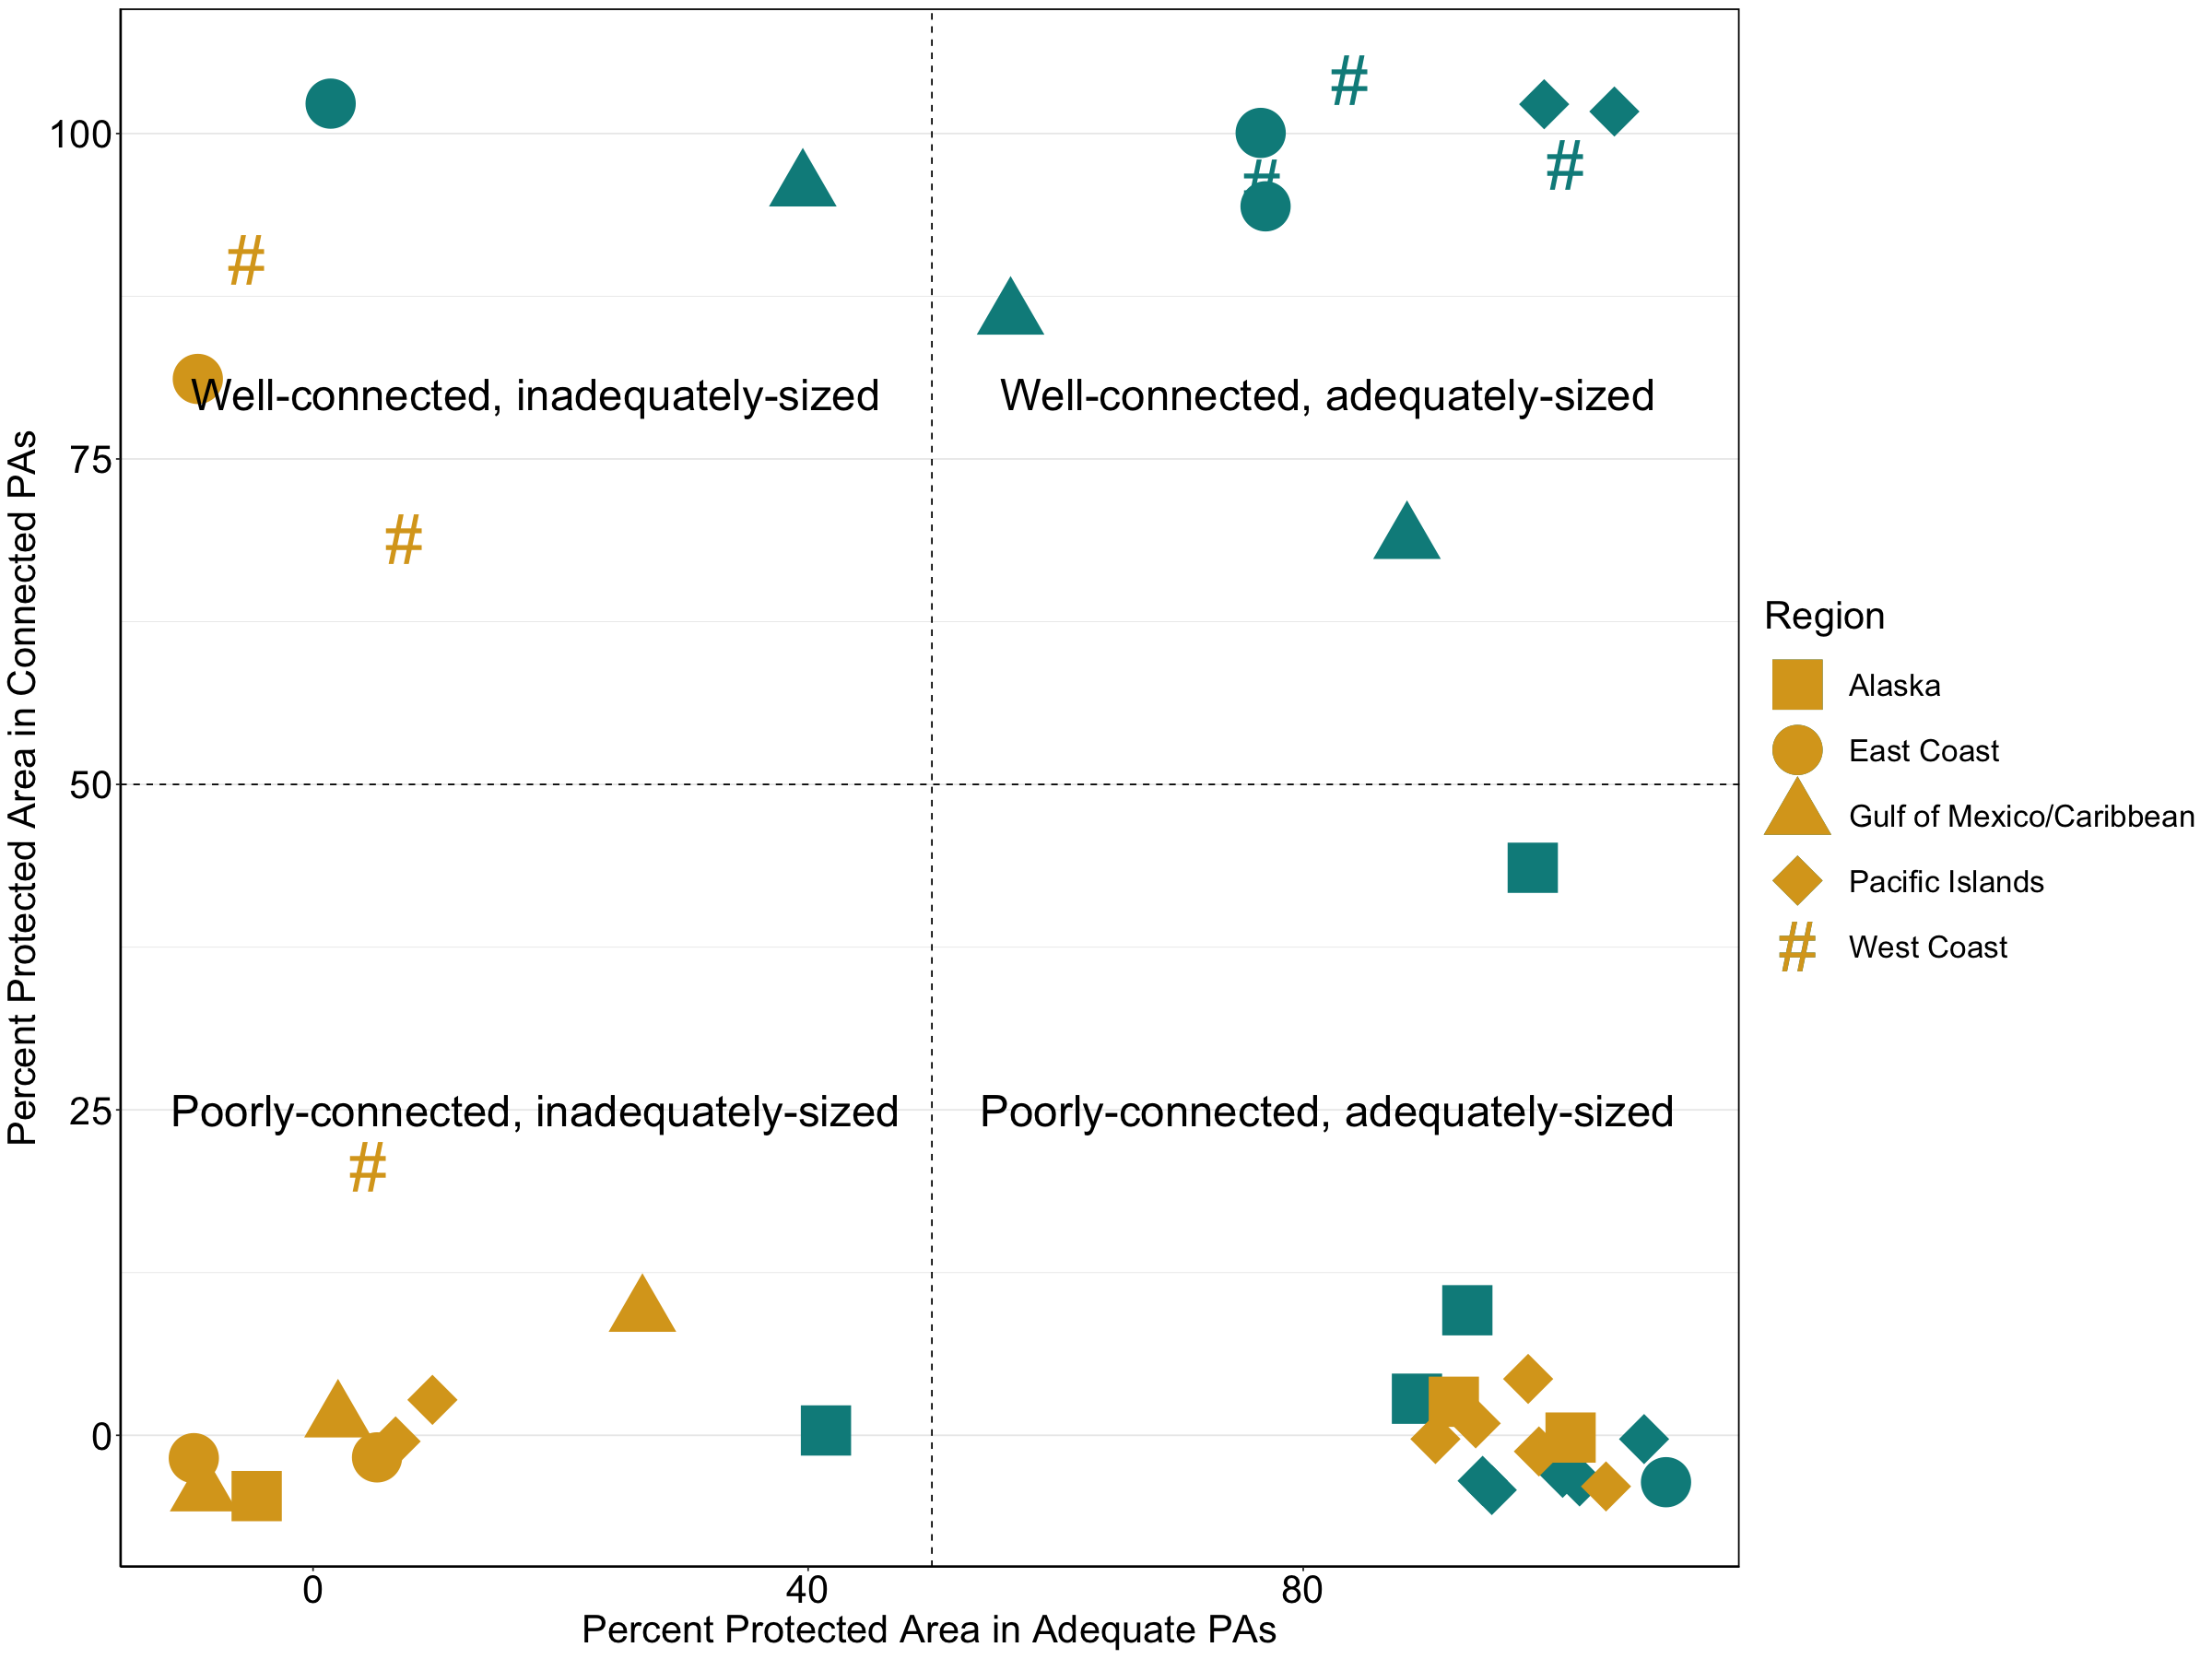

In [94]:
ggplot(adeqproxr, aes(x=(PCT_Large_MPA_Area)*100, y=100*(LT50km_MPA_PCT), shape=Region)) +
geom_jitter(position=position_jitter(height = 5, width=10), stat="identity", size=15, color="cyan4")+
#geom_text(aes(label=Ecoregion_ID), position = position_jitter(height = .1, width=0.1))+
geom_jitter(position = position_jitter(height = 5, width=10), stat="identity",  size=15, color="goldenrod",aes(x=100*(PCT_Large_FP_MPA_Area), y=100*(LT50km_FP_MPA_PCT), shape=Region))+
scale_color_manual(values=c("goldenrod", "cyan4"))+
scale_shape_manual(values=c(15,16,17,18,35))+
#facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
geom_hline(yintercept=50, linetype="dashed")+
geom_vline(xintercept=50, linetype="dashed")+
labs(x="Percent Protected Area in Adequate PAs")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
         # axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), 
      axis.text=element_text(color="black", size=25),
      text=element_text(color="black", size=25),
          strip.background = element_blank())+
#scale_x_reverse()+
#xlim(0,100)+
annotate("text", x=18, y=80, label= "Well-connected, inadequately-sized", size=10) + 
  annotate("text", x = 82, y=80, label = "Well-connected, adequately-sized", size=10)+
annotate("text", x=18, y=25, label= "Poorly-connected, inadequately-sized", size=10) + 
  annotate("text", x = 82, y=25, label = "Poorly-connected, adequately-sized", size=10)+
ylab("Percent Protected Area in Connected PAs")


In [51]:
ggsave(file="~/Documents/Lenfest/Figure2B.pdf", width=20, height=15)

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


In [97]:
adeqproxr

NAME,Ecoregion_ID,Large_MPA_Count,Large_FP_MPA_Count,PCT_Large_MPA_Area,PCT_Large_FP_MPA_Area,MPA_Near5_LT50km_Area,FP_MPA_Near5_LT50km_Area,ER_Area,LT50km_MPA_PCT,LT50km_FP_MPA_PCT,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,Region
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Acadian Atlantic,1,3,0,0.8551312,0.0000000,4729.80745,4.271676,100762.16,0.981529908,8.194784e-01,100762.16,4818.8113,5.212676e+00,4.7823623,0.005173248,East Coast
Alaskan/Fjordland Pacific,2,5,2,0.9999745,1.0000000,2820.86689,0.000000,1701319.78,0.401670902,0.000000e+00,1701319.78,7022.8311,9.414154e+02,0.4127872,0.055334416,Alaska
Aleutian Archipelago,3,2,2,0.9245074,1.0000000,346.78147,0.000000,185156.13,0.141106303,0.000000e+00,185156.13,2457.5902,2.123397e+03,1.3273070,1.146814569,Alaska
American Samoa,4,2,0,0.9996316,0.0000000,35357.49573,0.000000,406792.48,0.999542872,0.000000e+00,406792.48,35373.6660,7.513560e+00,8.6957522,0.001847025,Pacific Islands
Arctic Basin,5,0,0,0.0000000,0.0000000,NA,NA,226486.81,NA,NA,226486.81,0.0000,0.000000e+00,0.0000000,0.000000000,Alaska
Beaufort/Chukchi Seas,6,1,0,0.4986564,0.0000000,0.00000,NA,276280.28,0.000000000,NA,276280.28,816.5224,0.000000e+00,0.2955413,0.000000000,Alaska
Bering Sea,7,2,0,0.9506556,0.0000000,38.88971,0.000000,1295111.91,0.003017158,0.000000e+00,1295111.91,12889.5145,4.251868e+02,0.9952433,0.032830118,Alaska
Caribbean Sea,8,1,0,0.4198800,0.0000000,3576.27877,0.000000,212352.33,1.000000000,0.000000e+00,212352.33,3576.2788,9.638159e+01,1.6841250,0.045387584,Gulf of Mexico/Caribbean
Carolinian Atlantic,9,0,0,0.0000000,0.0000000,1451.63815,0.000000,127879.09,0.974911459,0.000000e+00,127879.09,1488.9949,1.073831e+01,1.1643771,0.008397238,East Coast


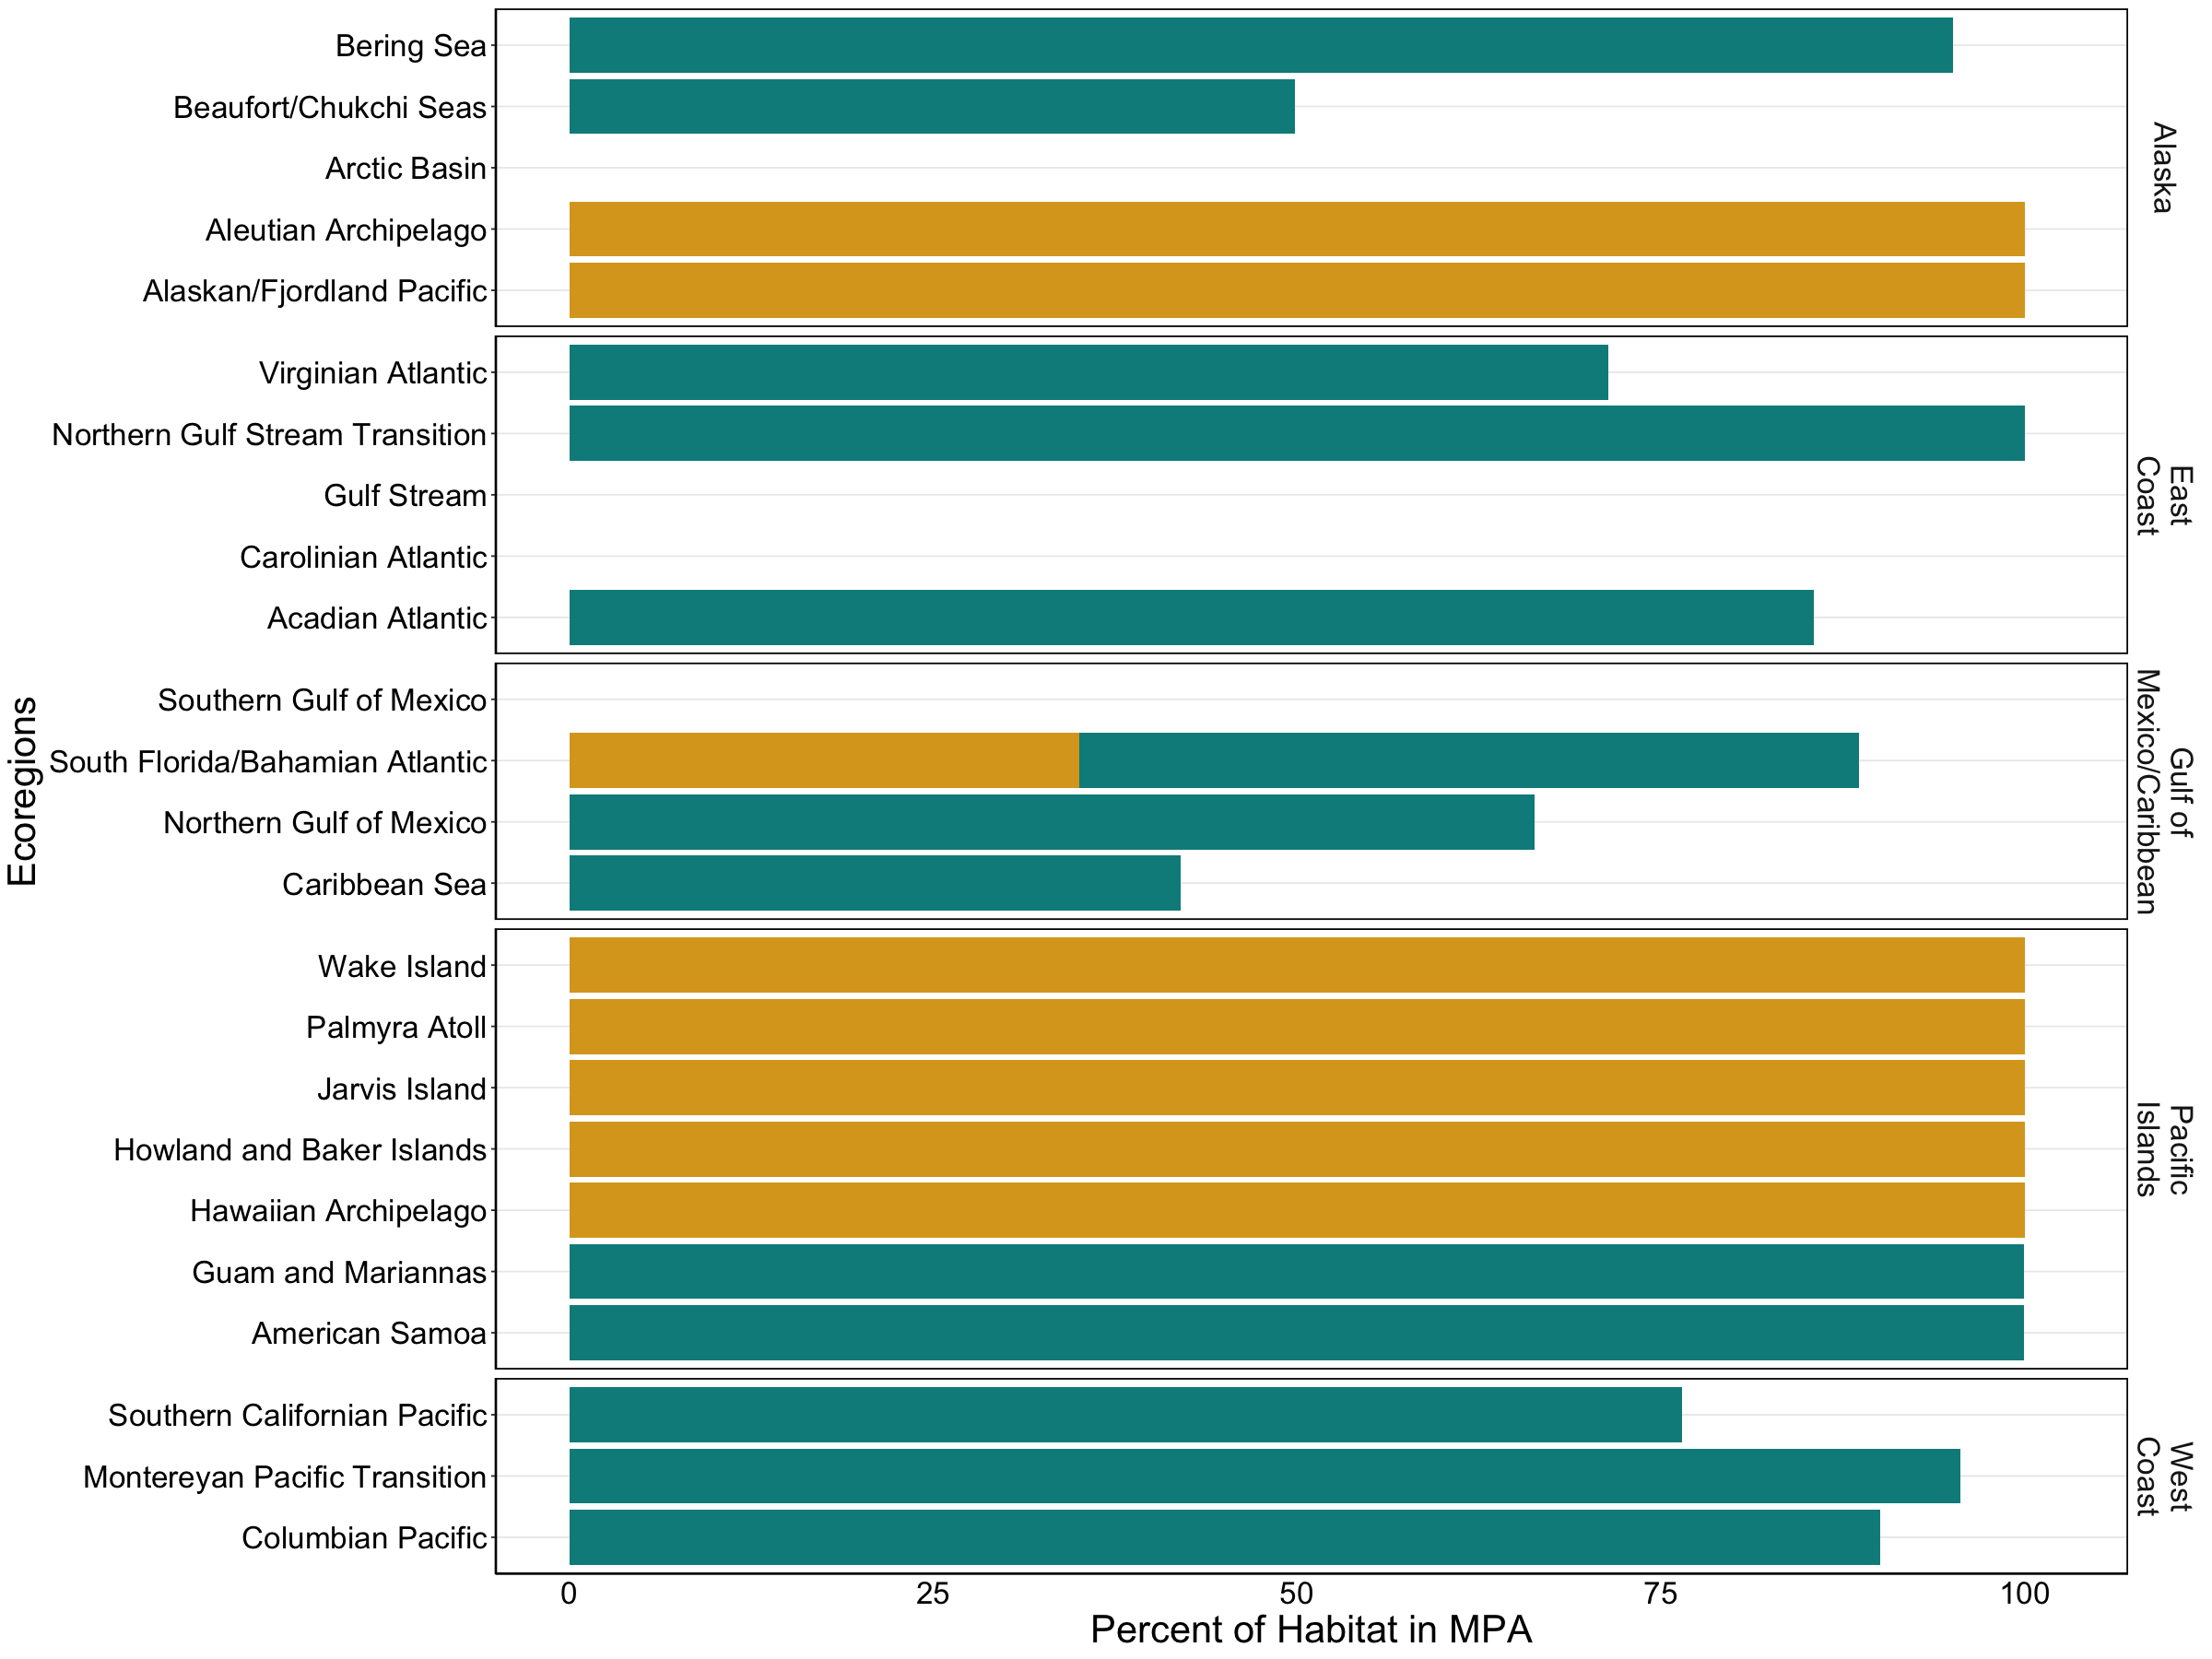

In [100]:
ggplot(adeqproxr)+ 
geom_bar(position="identity", stat="identity", aes(y=NAME, x=(PCT_Large_MPA_Area)*100), fill= "cyan4")+
geom_bar(position="identity", stat="identity", aes(y=NAME, x=(PCT_Large_FP_MPA_Area)*100), fill= "goldenrod")+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Protected Area in PAs", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,102)+
#coord_flip()+
ylab("Ecoregions")


In [101]:
ggsave(file="~/Documents/Lenfest/FigureS11_con.pdf", width=20, height=15)

In [ ]:
ggplot(mansear[mansear$Habitat=="Seagrass",], aes(y=NAME, x=percent)) +
geom_text(x=100, aes(label=ER.Covered.by.Seagrass),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,100)+
#coord_flip()+
ylab("Ecoregions")

In [31]:
proxr=merge(prox, region, by=c("NAME", "Ecoregion_ID"))

In [32]:
proxr=pivot_longer(proxr,
  cols=c('FP_MPA_Near5_Mean','MPA_Near5_Mean'),
  names_to = c("PA"),
  values_to = "mean"
         )

In [33]:
proxr

NAME,Ecoregion_ID,Region,PA,mean
<chr>,<int>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,East Coast,FP_MPA_Near5_Mean,58.15650
Acadian Atlantic,1,East Coast,MPA_Near5_Mean,34.04802
Alaskan/Fjordland Pacific,2,Alaska,FP_MPA_Near5_Mean,604.00000
Alaskan/Fjordland Pacific,2,Alaska,MPA_Near5_Mean,542.98620
Aleutian Archipelago,3,Alaska,FP_MPA_Near5_Mean,604.00000
Aleutian Archipelago,3,Alaska,MPA_Near5_Mean,604.00000
American Samoa,4,Pacific Islands,FP_MPA_Near5_Mean,140.36943
American Samoa,4,Pacific Islands,MPA_Near5_Mean,21.05658
Arctic Basin,5,Alaska,FP_MPA_Near5_Mean,604.00000


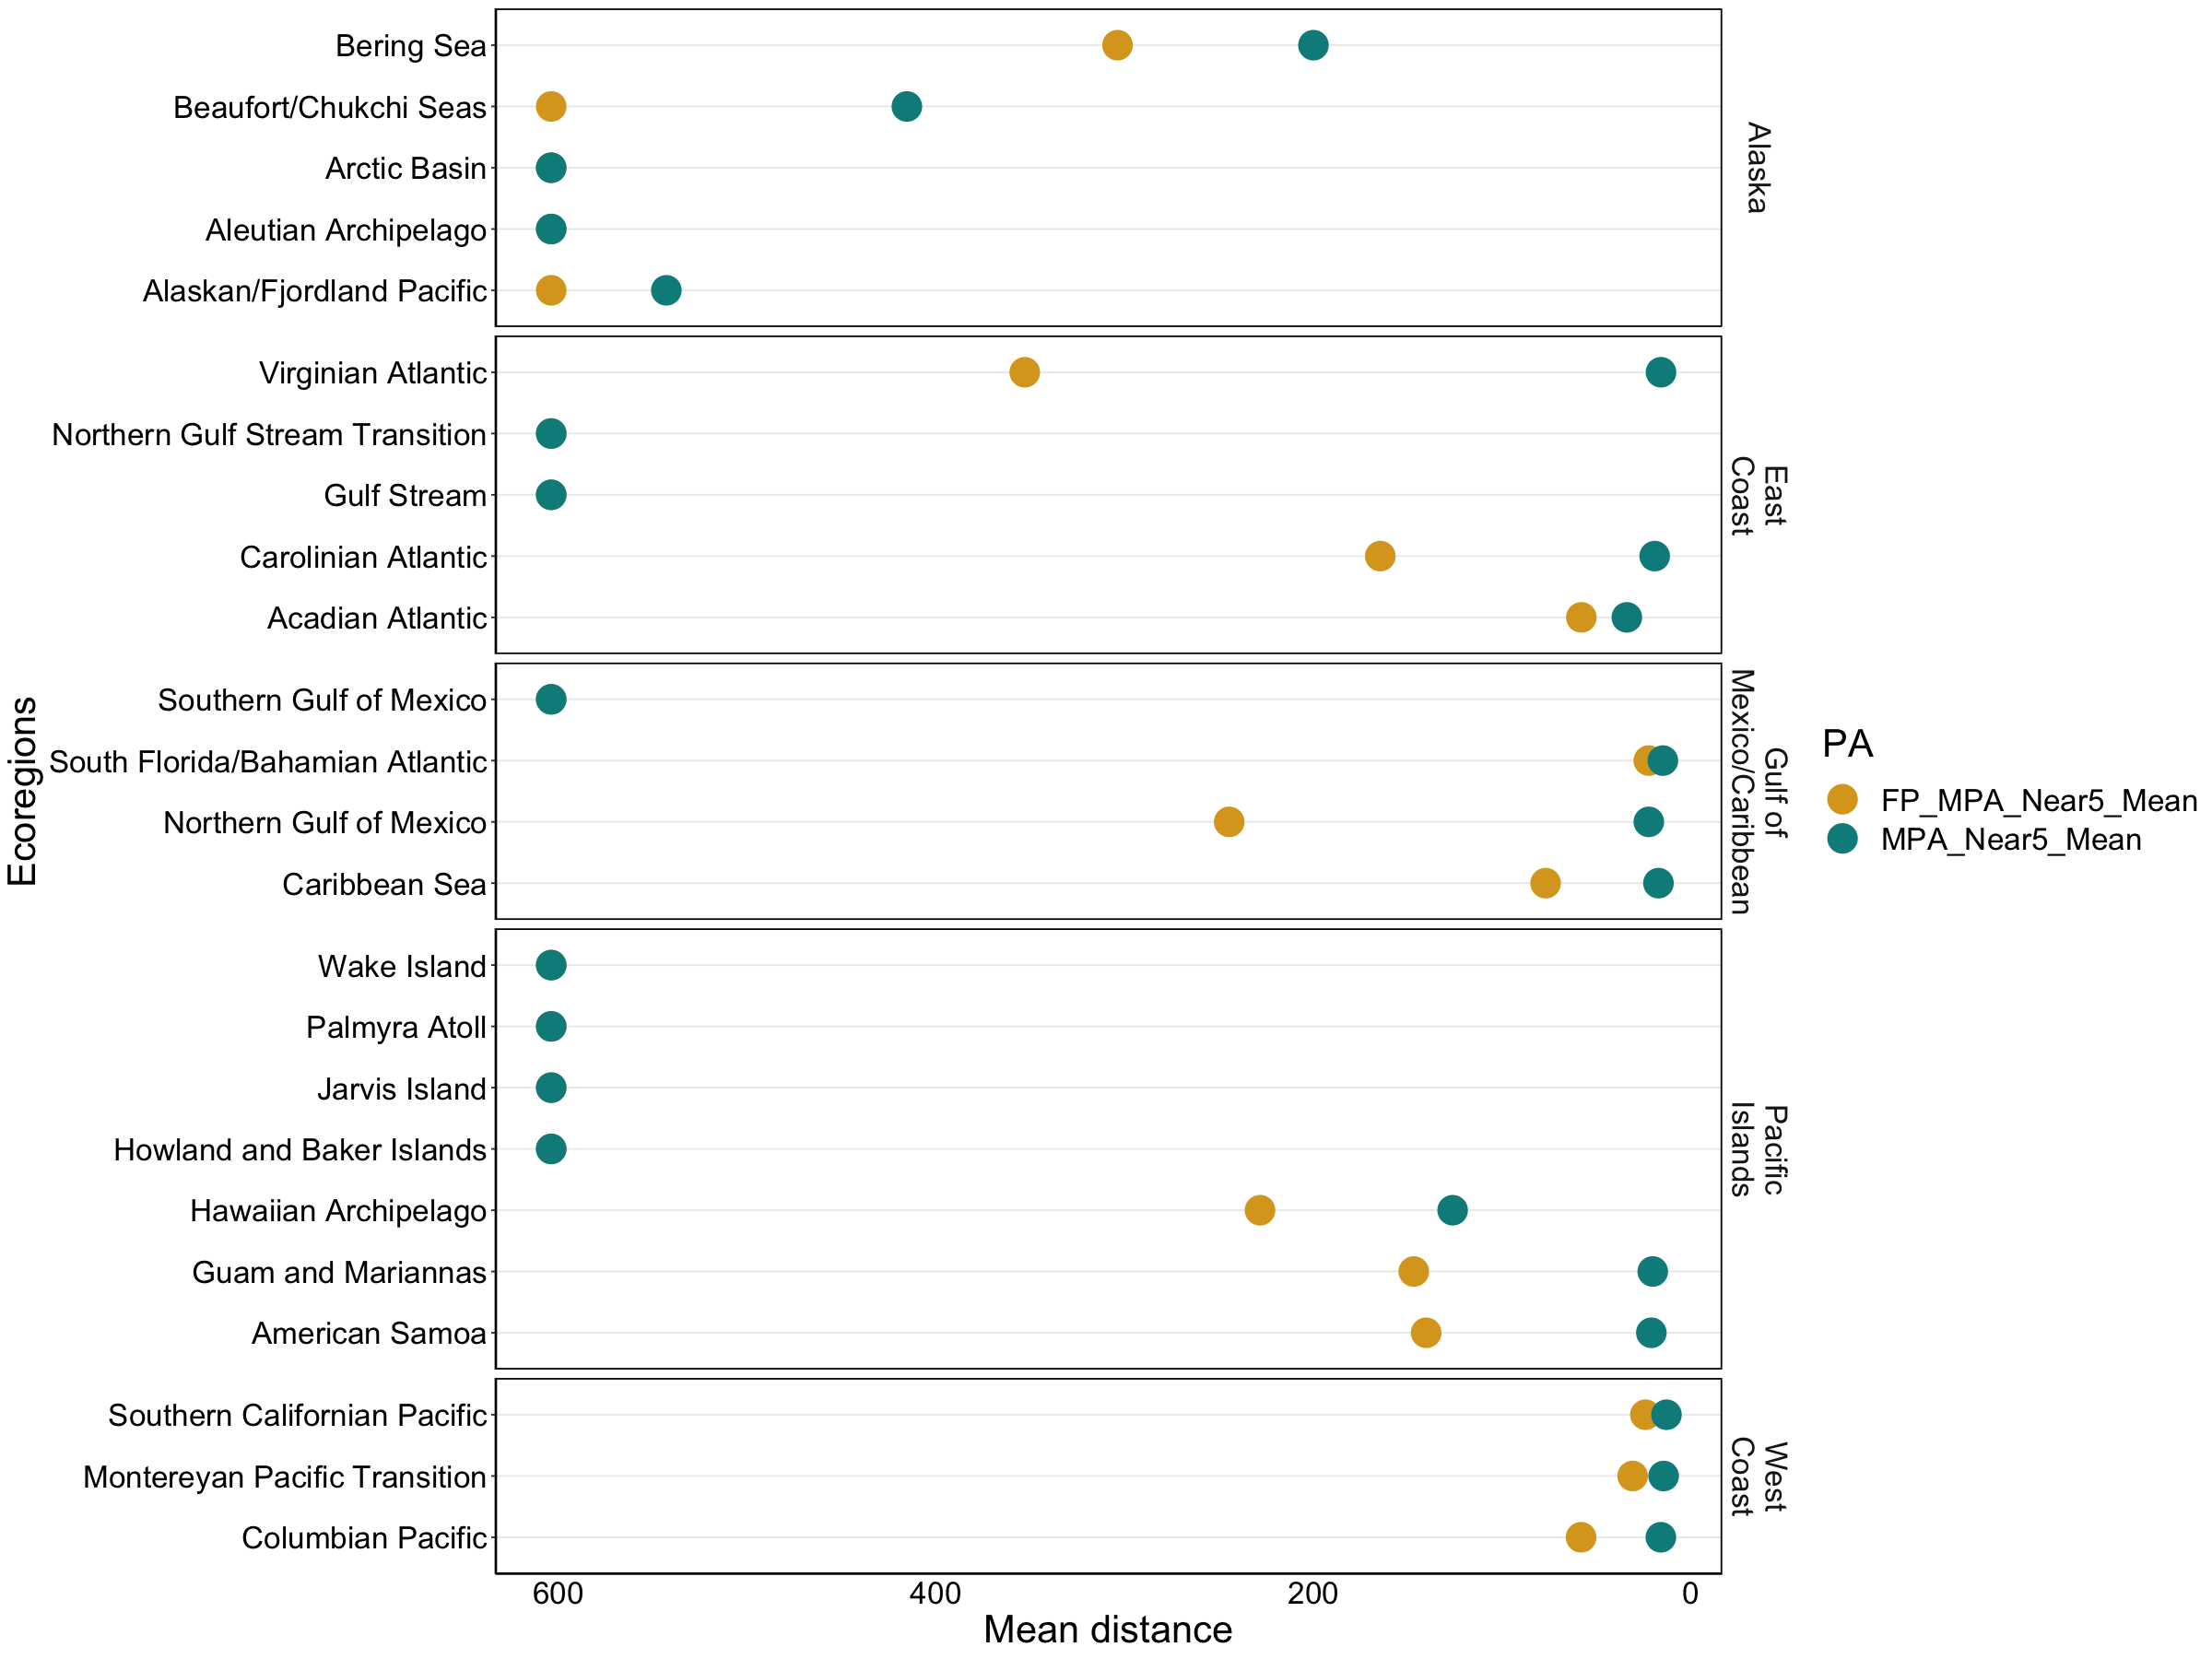

In [38]:
ggplot(proxr, aes(y=NAME, x=mean)) +
geom_point(position="identity", stat="identity", aes(color=PA ), shape=16, size=9)+
scale_color_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Mean distance", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
scale_x_reverse()+
#xlim(0,100)+

ylab("Ecoregions")

In [23]:
ggplot(seagrassr[seagrassr$PCT.of.ER.Covered.by.Seagrass>0,] ) +
geom_point(color="cyan4", aes(x = MPA_Count_Seagrass, y = NAME, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")), size=10)+
geom_point(color="goldenrod", aes(x = FPA_Count_Seagrass, y = NAME, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")), size=10)+
scale_shape_manual(values=c(111,79, 83))+      
#geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Number of MPAs with seagrass", shape="", size="Percent of ER")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

ERROR: Error in ggplot(seagrassr[seagrassr$PCT.of.ER.Covered.by.Seagrass > 0, : object 'seagrassr' not found
